##Q1

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms, datasets
import time
import gzip
from torchvision.datasets import MNIST
import torch.nn as nn
import torch.optim as optim

Total time to load in batches (batch size 64): 0.2875 seconds using custom code
Total time to load in batches (batch size 128): 0.2734 seconds using custom code
Total time to load in batches (batch size 256): 0.2696 seconds using custom code
Total time to load in batches (batch size 1024): 0.2639 seconds using custom code
Total time to load in batches (batch size 64): 11.8457 seconds using PyTorch
Total time to load in batches (batch size 128): 11.6063 seconds using PyTorch
Total time to load in batches (batch size 256): 11.4011 seconds using PyTorch
Total time to load in batches (batch size 1024): 11.4344 seconds using PyTorch


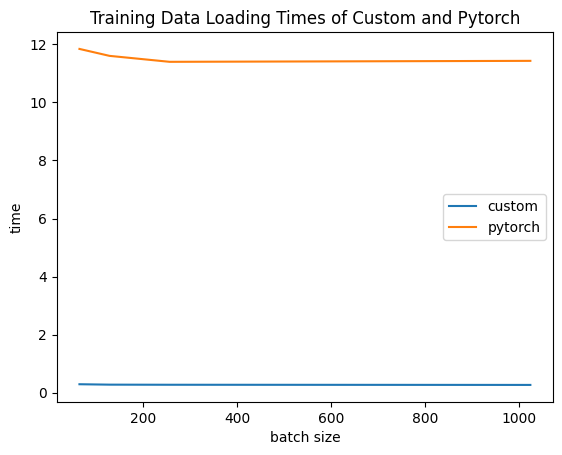

In [5]:
custom_training_times = []
pytorch_training_times = []

train_dataset = MNIST('./data', train=True, transform=True, download=True)
test_dataset = MNIST('./data', train=False, transform=True, download=True)

def load_mnist_images(filename, num_images):
    with gzip.open(filename, 'rb') as f:
        # Read magic number and dimensions
        magic_number = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        cols = int.from_bytes(f.read(4), 'big')

        # Read image data
        image_data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
        # Normalize pixel values to the range [0, 1]
        image_data = image_data / 255.0

    return image_data

def load_mnist_labels(filename, num_labels):
    with gzip.open(filename, 'rb') as f:
        # Read magic number and number of labels
        magic_number = int.from_bytes(f.read(4), 'big')
        num_labels = int.from_bytes(f.read(4), 'big')

        # Read label data
        label_data = np.frombuffer(f.read(), dtype=np.uint8)

    return label_data

def load_mnist_batch(images_filename, labels_filename, batch_size):
    with gzip.open(images_filename, 'rb') as f_images, gzip.open(labels_filename, 'rb') as f_labels:
        # Read image metadata
        magic_number_images = int.from_bytes(f_images.read(4), 'big')
        num_images = int.from_bytes(f_images.read(4), 'big')
        rows = int.from_bytes(f_images.read(4), 'big')
        cols = int.from_bytes(f_images.read(4), 'big')

        # Read label metadata
        magic_number_labels = int.from_bytes(f_labels.read(4), 'big')
        num_labels = int.from_bytes(f_labels.read(4), 'big')

        # Check if the number of images and labels match
        assert num_images == num_labels, "Number of images and labels do not match."

        # Determine the number of batches
        num_batches = num_images // batch_size
        for batch in range(num_batches):
            # Read image batch

            image_data = np.frombuffer(f_images.read(batch_size * rows * cols), dtype=np.uint8).reshape(batch_size, rows, cols)

            # Normalize pixel values to the range [0, 1]
            image_data = image_data / 255.0

            label_data = np.frombuffer(f_labels.read(batch_size), dtype=np.uint8)

            yield image_data, label_data

train_images_path = 'data/MNIST/raw/train-images-idx3-ubyte.gz'
train_labels_path = 'data/MNIST/raw/train-labels-idx1-ubyte.gz'
test_images_path = 'data/MNIST/raw/t10k-images-idx3-ubyte.gz'
test_labels_path = 'data/MNIST/raw/t10k-labels-idx1-ubyte.gz'

# Load training data for different batch sizes using custom code
batch_sizes = [64, 128, 256, 1024]
for batch_size in batch_sizes:
    start_time = time.time()
    for images, labels in load_mnist_batch(train_images_path, train_labels_path, batch_size):
        pass
    end_time = time.time()
    custom_training_times.append(end_time - start_time)
    print(f"Total time to load in batches (batch size {batch_size}): {end_time - start_time:.4f} seconds using custom code")

# Load training data for different batch sizes using PyTorch
for batch_size in batch_sizes:
    start_time = time.time()
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    for _, _ in train_loader:
        pass
    end_time = time.time()
    pytorch_training_times.append(end_time - start_time)
    print(f"Total time to load in batches (batch size {batch_size}): {end_time - start_time:.4f} seconds using PyTorch")

# Uncomment the following section if you want to load and time testing data using PyTorch
# pytorch_testing_times = []
# for batch_size in batch_sizes:
#     start_time = time.time()
#     test_loader = torch.utils.data.DataLoader(MNIST('./data', train=False, transform=transform, download=True), batch_size=batch_size, shuffle=False)
#     for _, _ in test_loader:
#         pass  # Process the batch here if needed
#     end_time = time.time()
#     pytorch_testing_times.append(end_time - start_time)
#     print(f"Total time to load testing data (batch size {batch_size}): {end_time - start_time:.4f} seconds using PyTorch")

# Plot custom and PyTorch loading times
plt.plot(batch_sizes, custom_training_times, label='custom')
plt.plot(batch_sizes, pytorch_training_times, label='pytorch')
plt.xlabel('batch size')
plt.ylabel('time')
plt.title('Training Data Loading Times of Custom and Pytorch')
plt.legend()
plt.show()


##Q2

<ipython-input-9-deab8723b3b0>:107: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  train_data = TensorDataset(torch.from_numpy(train_images), torch.from_numpy(train_labels))


Epoch 1/60 -> Train Loss: 2.3067, Train Accuracy: 0.0993 Validation Loss: 2.2980, Validation Accuracy: 0.1032
Epoch 2/60 -> Train Loss: 2.3053, Train Accuracy: 0.0993 Validation Loss: 2.2967, Validation Accuracy: 0.1032
Epoch 3/60 -> Train Loss: 2.3040, Train Accuracy: 0.0993 Validation Loss: 2.2955, Validation Accuracy: 0.1032
Epoch 4/60 -> Train Loss: 2.3028, Train Accuracy: 0.0993 Validation Loss: 2.2943, Validation Accuracy: 0.1032
Epoch 5/60 -> Train Loss: 2.3016, Train Accuracy: 0.0993 Validation Loss: 2.2933, Validation Accuracy: 0.1036
Epoch 6/60 -> Train Loss: 2.3005, Train Accuracy: 0.1082 Validation Loss: 2.2922, Validation Accuracy: 0.1305
Epoch 7/60 -> Train Loss: 2.2995, Train Accuracy: 0.1521 Validation Loss: 2.2912, Validation Accuracy: 0.1774
Epoch 8/60 -> Train Loss: 2.2984, Train Accuracy: 0.1795 Validation Loss: 2.2901, Validation Accuracy: 0.1831
Epoch 9/60 -> Train Loss: 2.2972, Train Accuracy: 0.1751 Validation Loss: 2.2890, Validation Accuracy: 0.1726
Epoch 10/6

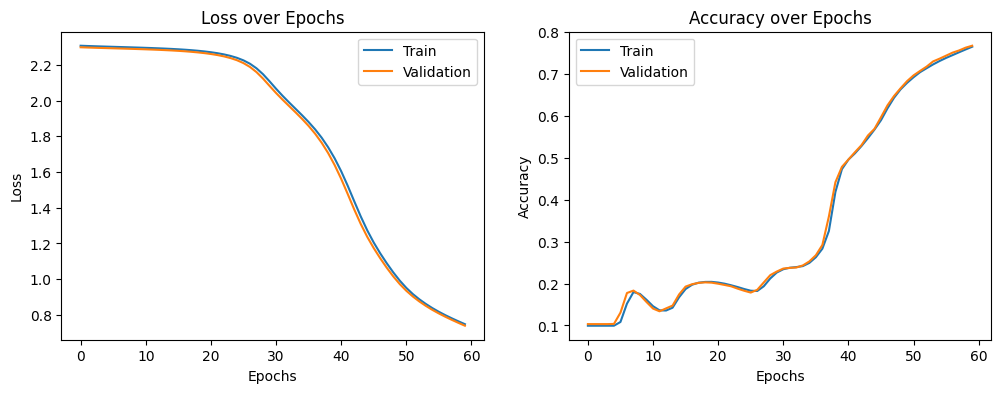

In [9]:
# Define the neural network architecture
class ModifiedNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(ModifiedNN, self).__init__()
        self.layers = nn.ModuleList()
        in_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(in_size, hidden_size))
            self.layers.append(nn.ReLU())
            in_size = hidden_size
        self.layers.append(nn.Linear(in_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Function to train the model
def train_model(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in load_mnist_batch(train_images_path, train_labels_path, batch_size):
        inputs = torch.from_numpy(inputs)
        labels = torch.from_numpy(labels)
        inputs, labels = inputs.to(dtype=torch.float32), labels

        optimizer.zero_grad()
        outputs = model(inputs.view(inputs.size(0), -1))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct_predictions += predicted.eq(labels).sum().item()
        total_samples += labels.size(0)

    average_loss = total_loss / len(train_loader)
    accuracy = correct_predictions / total_samples

    return average_loss, accuracy

# Function to evaluate the model on validation or test set
def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in load_mnist_batch(test_images_path, test_labels_path, batch_size):
            inputs = torch.from_numpy(inputs)
            labels = torch.from_numpy(labels)
            inputs, labels = inputs.to(dtype=torch.float32), labels

            outputs = model(inputs.view(inputs.size(0), -1))
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct_predictions += predicted.eq(labels).sum().item()
            total_samples += labels.size(0)

    average_loss = total_loss / len(data_loader)
    accuracy = correct_predictions / total_samples

    return average_loss, accuracy

# Function to plot training progress
def plot_progress(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train')
    plt.plot(val_accuracies, label='Validation')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Load MNIST data with the custom DataLoader functions
batch_size = 32
train_transform = transforms.Compose([transforms.ToTensor()])
train_dataset = MNIST('./data', train=True, transform=train_transform, download=True)

# Convert the MNIST data to NumPy arrays using custom functions
train_images = load_mnist_images('data/MNIST/raw/train-images-idx3-ubyte.gz', len(train_dataset))
train_labels = load_mnist_labels('data/MNIST/raw/train-labels-idx1-ubyte.gz', len(train_dataset))
test_images = load_mnist_images('data/MNIST/raw/t10k-images-idx3-ubyte.gz', 10000)
test_labels = load_mnist_labels('data/MNIST/raw/t10k-labels-idx1-ubyte.gz', 10000)
# Create a DataLoader from NumPy arrays
train_data = TensorDataset(torch.from_numpy(train_images), torch.from_numpy(train_labels))
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data = TensorDataset(torch.from_numpy(test_images), torch.from_numpy(test_labels))
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
input_size = 28 * 28  # MNIST image size
hidden_sizes = [32, 32, 32, 32]  # Four hidden layers with 32 neurons each
output_size = 10  # Number of classes (digits 0-9)
model = ModifiedNN(input_size, hidden_sizes, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0003)

# Training loop
num_epochs = 60
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Train the model
    train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_loss, val_accuracy = evaluate_model(model, test_loader, criterion)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs} -> Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}',
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

plot_progress(train_losses, val_losses, train_accuracies, val_accuracies)


## Q2 with sigmoid

In [11]:
times_custom = []

def load_mnist_batch(images_filename, labels_filename, batch_size):
    with gzip.open(images_filename, 'rb') as f_images, gzip.open(labels_filename, 'rb') as f_labels:
        # Read image metadata
        magic_number_images = int.from_bytes(f_images.read(4), 'big')
        num_images = int.from_bytes(f_images.read(4), 'big')
        rows = int.from_bytes(f_images.read(4), 'big')
        cols = int.from_bytes(f_images.read(4), 'big')

        # Read label metadata
        magic_number_labels = int.from_bytes(f_labels.read(4), 'big')
        num_labels = int.from_bytes(f_labels.read(4), 'big')

        # Check if the number of images and labels match
        assert num_images == num_labels, "Number of images and labels do not match."

        # Determine the number of batches
        num_batches = num_images // batch_size
        start_time = time.time()
        batch_data = []
        for batch in range(num_batches):
            # Read image batch
            image_data = np.frombuffer(f_images.read(batch_size * rows * cols), dtype=np.uint8).reshape(batch_size, rows, cols)
            # Normalize
            image_data = image_data / 255.0
            label_data = np.frombuffer(f_labels.read(batch_size), dtype=np.uint8)

            # Convert to PyTorch tensors
            image_data = torch.tensor(image_data, dtype=torch.float32)
            label_data = torch.tensor(label_data, dtype=torch.int64)

            batch_data.append((image_data, label_data))

        end_time = time.time()
        print(f"Time to load (batch size {batch_size}): {end_time - start_time:.4f} seconds")
        times_custom.append(end_time - start_time)

        return batch_data

train_images_path = 'data/MNIST/raw/train-images-idx3-ubyte.gz'
train_labels_path = 'data/MNIST/raw/train-labels-idx1-ubyte.gz'
test_images_path = 'data/MNIST/raw/t10k-images-idx3-ubyte.gz'
test_labels_path = 'data/MNIST/raw/t10k-labels-idx1-ubyte.gz'

# Load training data for different batch sizes
batch_sizes = [64, 128, 256, 1024]

for batch_size in batch_sizes:
    _ = load_mnist_batch(train_images_path, train_labels_path, batch_size)
    _ = load_mnist_batch(test_images_path, test_labels_path, batch_size)


Time to load (batch size 64): 0.4357 seconds
Time to load (batch size 64): 0.0657 seconds
Time to load (batch size 128): 0.4090 seconds
Time to load (batch size 128): 0.0628 seconds
Time to load (batch size 256): 0.3891 seconds
Time to load (batch size 256): 0.0723 seconds
Time to load (batch size 1024): 0.2997 seconds
Time to load (batch size 1024): 0.0508 seconds


Time to load (batch size 32): 0.6870 seconds
Epoch [1/60], Training Loss: 2.1707, Training Accuracy: 32.76%
Time to train epoch: 5.1167 seconds
Time to load (batch size 32): 0.0705 seconds
Validation Loss: 2.0847, Validation Accuracy: 50.37%
Time to load (batch size 32): 0.4147 seconds
Epoch [2/60], Training Loss: 2.0420, Training Accuracy: 54.88%
Time to train epoch: 4.7732 seconds
Time to load (batch size 32): 0.1018 seconds
Validation Loss: 1.9918, Validation Accuracy: 62.63%
Time to load (batch size 32): 0.4197 seconds
Epoch [3/60], Training Loss: 1.9632, Training Accuracy: 65.36%
Time to train epoch: 4.3448 seconds
Time to load (batch size 32): 0.0683 seconds
Validation Loss: 1.9225, Validation Accuracy: 71.06%
Time to load (batch size 32): 0.3999 seconds
Epoch [4/60], Training Loss: 1.9000, Training Accuracy: 71.53%
Time to train epoch: 4.3501 seconds
Time to load (batch size 32): 0.0639 seconds
Validation Loss: 1.8637, Validation Accuracy: 74.74%
Time to load (batch size 32): 0.

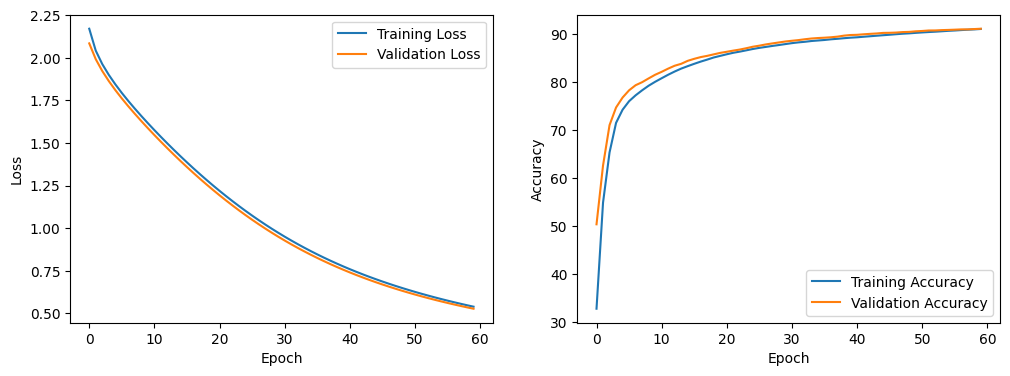

In [12]:
# FeedForward NN with 5 layers
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class CustomNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomNeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.batch_norm1 = nn.BatchNorm1d(hidden_size)
        self.activation1 = nn.Sigmoid()

        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.batch_norm2 = nn.BatchNorm1d(hidden_size)
        self.activation2 = nn.Sigmoid()

        self.layer3 = nn.Linear(hidden_size, hidden_size)
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)
        self.activation3 = nn.Sigmoid()

        self.layer4 = nn.Linear(hidden_size, hidden_size)
        self.batch_norm4 = nn.BatchNorm1d(hidden_size)
        self.activation4 = nn.Sigmoid()

        self.layer5 = nn.Linear(hidden_size, output_size)
        self.batch_norm5 = nn.BatchNorm1d(hidden_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.batch_norm1(x)
        x = self.activation1(x)

        x = self.layer2(x)
        x = self.batch_norm2(x)
        x = self.activation2(x)

        x = self.layer3(x)
        x = self.batch_norm3(x)
        x = self.activation3(x)

        x = self.layer4(x)
        x = self.batch_norm4(x)
        x = self.activation4(x)

        x = self.layer5(x)
        return x

custom_network = CustomNeuralNetwork(28*28, 32, 10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(custom_network.parameters(), lr=0.0003)

# Load the data using a custom dataloader
epochs = 60
training_losses_custom = []
training_accuracies_custom = []
validation_losses_custom = []
validation_accuracies_custom = []
batch_size_custom = 32

for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()

    for images, labels in load_mnist_batch(train_images_path, train_labels_path, batch_size_custom):
        # Forward, backward, update params
        images = images.view(-1, 28*28)
        images, labels = images.to(device), labels.to(device)
        outputs = custom_network(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    running_loss *= batch_size_custom
    training_losses_custom.append(running_loss / total)
    training_accuracies_custom.append(correct / total)
    end_time = time.time()

    print(f'Epoch [{epoch + 1}/{epochs}], '
          f'Training Loss: {running_loss / total:.4f}, Training Accuracy: {100 * correct / total:.2f}%')
    print(f"Time to train epoch: {end_time - start_time:.4f} seconds")

    # Test the model
    with torch.no_grad():
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in load_mnist_batch(test_images_path, test_labels_path, batch_size_custom):
            images, labels = images.to(device), labels.to(device)
            images = images.view(-1, 28*28)
            outputs = custom_network(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        running_loss *= batch_size_custom
        validation_losses_custom.append(running_loss / total)
        validation_accuracies_custom.append(correct / total)
        print(f'Validation Loss: {running_loss / total:.4f}, Validation Accuracy: {100 * correct / total:.2f}%')

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_losses_custom, label='Training Loss')
plt.plot(validation_losses_custom, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([100 * i for i in training_accuracies_custom], label='Training Accuracy')
plt.plot([100 * i for i in validation_accuracies_custom], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Q3 backprop with Relu

Time to load (batch size 64): 0.5641 seconds
Time to load (batch size 64): 0.0614 seconds
Epoch 1 - Loss: 7.4666, Accuracy: 9.18%
Validation Loss: 7.4666, Accuracy: 9.18%
Time to load (batch size 64): 0.3779 seconds
Time to load (batch size 64): 0.0592 seconds
Epoch 2 - Loss: 4.6743, Accuracy: 10.99%
Validation Loss: 4.6743, Accuracy: 10.99%
Time to load (batch size 64): 0.3682 seconds
Time to load (batch size 64): 0.0678 seconds
Epoch 3 - Loss: 3.2814, Accuracy: 15.10%
Validation Loss: 3.2814, Accuracy: 15.10%
Time to load (batch size 64): 0.4264 seconds
Time to load (batch size 64): 0.0603 seconds
Epoch 4 - Loss: 2.7206, Accuracy: 21.35%
Validation Loss: 2.7206, Accuracy: 21.35%
Time to load (batch size 64): 0.3982 seconds
Time to load (batch size 64): 0.0871 seconds
Epoch 5 - Loss: 2.4626, Accuracy: 25.23%
Validation Loss: 2.4626, Accuracy: 25.23%
Time to load (batch size 64): 0.5065 seconds
Time to load (batch size 64): 0.0629 seconds
Epoch 6 - Loss: 2.3180, Accuracy: 27.91%
Valida

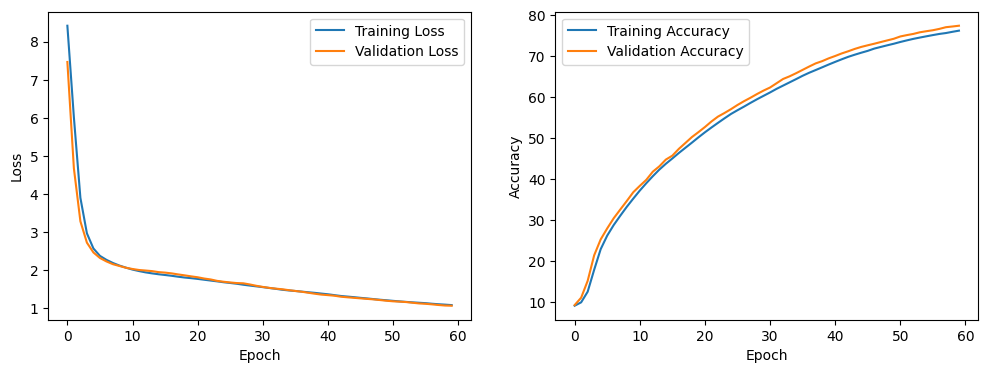

In [13]:
def custom_cross_entropy_loss(predictions, targets):
    # Convert targets to one-hot encoding
    y = torch.zeros_like(predictions)
    y[range(predictions.shape[0]), targets] = 1

    # Clip predictions to avoid numerical instability
    epsilon = 1e-15
    predictions = torch.clamp(predictions, epsilon, 1.0 - epsilon)

    # Calculate cross-entropy loss
    cross_entropy_loss = -torch.sum(y * torch.log(predictions))
    return cross_entropy_loss / predictions.shape[0]

def custom_cross_entropy_loss_backward(outputs, labels):
    y = torch.zeros_like(outputs)
    y[range(outputs.shape[0]), labels] = 1
    return (outputs - y) / outputs.shape[0]

def custom_relu_forward(x):
    return torch.max(torch.zeros_like(x), x)

def custom_relu_backward(x):
    return (x > 0).float()

def custom_sigmoid_forward(x):
    x -= torch.max(x)
    return 1 / (1 + torch.exp(-x))

def custom_sigmoid_backward(x):
    return x * (1 - x)

class CustomNeuralNetwork:
    def __init__(self):
        self.weights1 = torch.randn(784, 32) * np.sqrt(2 / (784 + 32))
        self.biases1 = torch.randn(32) * np.sqrt(2 / (784 + 32))
        self.weights2 = torch.randn(32, 32) * np.sqrt(2 / (32 + 32))
        self.biases2 = torch.randn(32) * np.sqrt(2 / (32 + 32))
        self.weights3 = torch.randn(32, 32) * np.sqrt(2 / (32 + 32))
        self.biases3 = torch.randn(32) * np.sqrt(2 / (32 + 32))
        self.weights4 = torch.randn(32, 32) * np.sqrt(2 / (32 + 32))
        self.biases4 = torch.randn(32) * np.sqrt(2 / (32 + 32))
        self.weights5 = torch.randn(32, 10) * np.sqrt(2 / (32 + 10))
        self.biases5 = torch.randn(10) * np.sqrt(2 / (32 + 10))

    def forward(self, x):
        self.x1 = x.view(-1, 784)  # Flatten the input
        self.y1 = torch.matmul(self.x1, self.weights1) + self.biases1
        self.x2 = custom_relu_forward(self.y1)
        self.y2 = torch.matmul(self.x2, self.weights2) + self.biases2
        self.x3 = custom_relu_forward(self.y2)
        self.y3 = torch.matmul(self.x3, self.weights3) + self.biases3
        self.x4 = custom_relu_forward(self.y3)
        self.y4 = torch.matmul(self.x4, self.weights4) + self.biases4
        self.x5 = custom_relu_forward(self.y4)
        self.y5 = torch.matmul(self.x5, self.weights5) + self.biases5
        return self.y5

    def backward(self, y, outputs):
        # Initialize gradients
        weights_gradients = [torch.zeros_like(self.weights1), torch.zeros_like(self.weights2),
                             torch.zeros_like(self.weights3), torch.zeros_like(self.weights4),
                             torch.zeros_like(self.weights5)]
        biases_gradients = [torch.zeros_like(self.biases1), torch.zeros_like(self.biases2),
                            torch.zeros_like(self.biases3), torch.zeros_like(self.biases4),
                            torch.zeros_like(self.biases5)]

        # Calculate gradients using sigmoid function
        loss_grad = custom_cross_entropy_loss_backward(outputs, y)
        weights_gradients[4] = torch.matmul(self.x5.t(), loss_grad)
        biases_gradients[4] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.weights5.t()) * custom_relu_backward(self.x5)

        weights_gradients[3] = torch.matmul(self.x4.t(), loss_grad)
        biases_gradients[3] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.weights4.t()) * custom_relu_backward(self.x4)

        weights_gradients[2] = torch.matmul(self.x3.t(), loss_grad)
        biases_gradients[2] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.weights3.t()) * custom_relu_backward(self.x3)

        weights_gradients[1] = torch.matmul(self.x2.t(), loss_grad)
        biases_gradients[1] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.weights2.t()) * custom_relu_backward(self.x2)

        weights_gradients[0] = torch.matmul(self.x1.t(), loss_grad)
        biases_gradients[0] = torch.sum(loss_grad, dim=0)

        return weights_gradients, biases_gradients

    def update(self, weights_gradients, biases_gradients, learning_rate):
        self.weights1 -= learning_rate * weights_gradients[0]
        self.biases1 -= learning_rate * biases_gradients[0]
        self.weights2 -= learning_rate * weights_gradients[1]
        self.biases2 -= learning_rate * biases_gradients[1]
        self.weights3 -= learning_rate * weights_gradients[2]
        self.biases3 -= learning_rate * biases_gradients[2]
        self.weights4 -= learning_rate * weights_gradients[3]
        self.biases4 -= learning_rate * biases_gradients[3]
        self.weights5 -= learning_rate * weights_gradients[4]
        self.biases5 -= learning_rate * biases_gradients[4]

custom_model = CustomNeuralNetwork()
custom_loss_train = []
custom_loss_validation = []
custom_accuracy_train = []
custom_accuracy_validation = []
custom_batch_size = 64
custom_num_epochs = 60

# Load training data for different batch sizes
for epoch in range(custom_num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()
    for images, labels in load_mnist_batch(train_images_path, train_labels_path, custom_batch_size):
        output = custom_model.forward(images)
        loss = custom_cross_entropy_loss(output, labels)
        weights_gradients, biases_gradients = custom_model.backward(labels, output)
        custom_model.update(weights_gradients, biases_gradients, 0.0003)
        running_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    running_loss *= custom_batch_size
    end_time = time.time()
    custom_loss_train.append(running_loss / total)
    custom_accuracy_train.append(100 * correct / total)

    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in load_mnist_batch(test_images_path, test_labels_path, custom_batch_size):
        output = custom_model.forward(images)
        loss = custom_cross_entropy_loss(output, labels)
        running_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    running_loss *= custom_batch_size
    custom_loss_validation.append(running_loss / total)
    custom_accuracy_validation.append(100 * correct / total)
    print(f"Epoch {epoch + 1} - Loss: {running_loss / total:.4f}, Accuracy: {100 * correct / total:.2f}%")
    print(f"Validation Loss: {running_loss / total:.4f}, Accuracy: {100 * correct / total:.2f}%")

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(custom_loss_train, label='Training Loss')
plt.plot(custom_loss_validation, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(custom_accuracy_train, label='Training Accuracy')
plt.plot(custom_accuracy_validation, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## backprop with sigmoid

Time to load (batch size 64): 0.5812 seconds


<ipython-input-14-111ca27614fb>:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights_gradients = [torch.tensor(i, requires_grad=False) for i in weights_gradients]
<ipython-input-14-111ca27614fb>:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  biases_gradients = [torch.tensor(i, requires_grad=False) for i in biases_gradients]
<ipython-input-14-111ca27614fb>:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_norm_gradients = [torch.tensor(i, requires_grad=False) for i in batch_norm_gradients]


Time to load (batch size 64): 0.0699 seconds
Epoch 1 - Loss: 5.6008, Accuracy: 31.09%
Validation Loss: 5.6008, Accuracy: 31.09%
Time to load (batch size 64): 0.4410 seconds
Time to load (batch size 64): 0.0617 seconds
Epoch 2 - Loss: 4.3843, Accuracy: 39.59%
Validation Loss: 4.3843, Accuracy: 39.59%
Time to load (batch size 64): 0.3758 seconds
Time to load (batch size 64): 0.0639 seconds
Epoch 3 - Loss: 3.8100, Accuracy: 44.21%
Validation Loss: 3.8100, Accuracy: 44.21%
Time to load (batch size 64): 0.3717 seconds
Time to load (batch size 64): 0.0605 seconds
Epoch 4 - Loss: 3.2568, Accuracy: 48.70%
Validation Loss: 3.2568, Accuracy: 48.70%
Time to load (batch size 64): 0.3683 seconds
Time to load (batch size 64): 0.0716 seconds
Epoch 5 - Loss: 2.8045, Accuracy: 52.05%
Validation Loss: 2.8045, Accuracy: 52.05%
Time to load (batch size 64): 0.4758 seconds
Time to load (batch size 64): 0.0643 seconds
Epoch 6 - Loss: 2.5054, Accuracy: 54.99%
Validation Loss: 2.5054, Accuracy: 54.99%
Time to

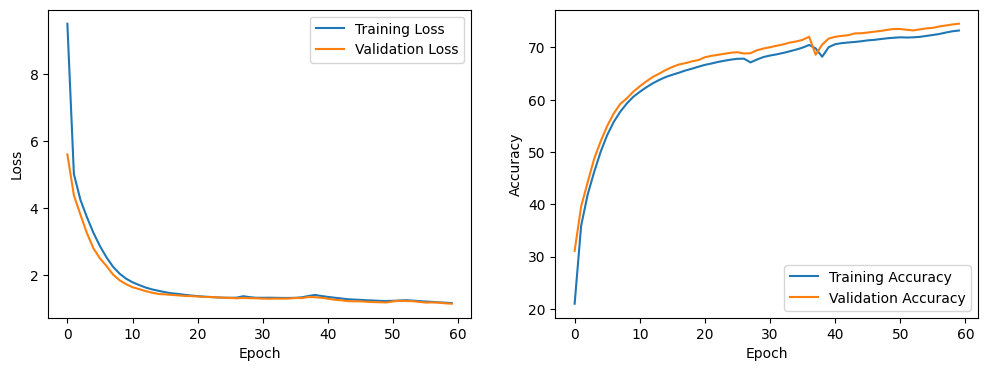

In [14]:
def custom_cross_entropy_loss(predictions, targets):
    # Convert targets to one-hot encoding
    y = torch.zeros_like(predictions)
    y[range(predictions.shape[0]), targets] = 1

    # Clip predictions to avoid numerical instability
    epsilon = 1e-15
    predictions = torch.clamp(predictions, epsilon, 1.0 - epsilon)

    # Calculate cross-entropy loss
    cross_entropy_loss = -torch.sum(y * torch.log(predictions))
    return cross_entropy_loss / predictions.shape[0]

def custom_cross_entropy_loss_backward(outputs, labels):
    y = torch.zeros_like(outputs)
    y[range(outputs.shape[0]), labels] = 1
    return (outputs - y) / outputs.shape[0]

def custom_relu_forward(x):
    return torch.max(torch.zeros_like(x), x)

def custom_relu_backward(x):
    return (x > 0).float()

def custom_sigmoid_forward(x):
    return 1 / (1 + torch.exp(-x))

def custom_sigmoid_backward(x):
    return x * (1 - x)

def custom_batch_norm_forward(x, gamma, beta, epsilon):
    mean = torch.mean(x, dim=0)
    variance = torch.var(x, dim=0)
    x_norm = (x - mean) / torch.sqrt(variance + epsilon)
    return gamma * x_norm + beta

def custom_batch_norm_backward(grad_output, x, gamma, beta, epsilon):
    mean = torch.mean(x, dim=0)
    variance = torch.var(x, dim=0)
    x_norm = (x - mean) / torch.sqrt(variance + epsilon)
    grad_x_norm = grad_output * gamma
    grad_variance = torch.sum(grad_x_norm * (x - mean) * (-0.5) * (variance + epsilon)**(-1.5), dim=0)
    grad_mean = torch.sum(grad_x_norm * (-1 / torch.sqrt(variance + epsilon)), dim=0) + grad_variance * torch.mean(-2 * (x - mean), dim=0)
    grad_x = grad_x_norm / torch.sqrt(variance + epsilon) + grad_variance * 2 * (x - mean) / x.shape[0] + grad_mean / x.shape[0]
    grad_gamma = torch.sum(grad_output * x_norm, dim=0)
    grad_beta = torch.sum(grad_output, dim=0)
    return grad_x, grad_gamma, grad_beta

class CustomNeuralNet(torch.nn.Module):
    def __init__(self):
        super(CustomNeuralNet, self).__init__()
        self.weights1 = torch.randn(784, 32)
        self.biases1 = torch.randn(32)
        self.norm1_gamma = torch.ones(32)
        self.norm1_beta = torch.zeros(32)
        self.weights2 = torch.randn(32, 32)
        self.biases2 = torch.randn(32)
        self.norm2_gamma = torch.ones(32)
        self.norm2_beta = torch.zeros(32)
        self.weights3 = torch.randn(32, 32)
        self.biases3 = torch.randn(32)
        self.norm3_gamma = torch.ones(32)
        self.norm3_beta = torch.zeros(32)
        self.weights4 = torch.randn(32, 32)
        self.biases4 = torch.randn(32)
        self.norm4_gamma = torch.ones(32)
        self.norm4_beta = torch.zeros(32)
        self.weights5 = torch.randn(32, 10)
        self.biases5 = torch.randn(10)

    def forward(self, x):
        self.x1 = x.view(-1, 784)  # flatten the input
        self.y1 = torch.matmul(self.x1, self.weights1) + self.biases1
        self.norm1 = custom_batch_norm_forward(self.y1, self.norm1_gamma, self.norm1_beta, 1e-5)
        self.x2 = custom_sigmoid_forward(self.norm1)
        self.y2 = torch.matmul(self.x2, self.weights2) + self.biases2
        self.norm2 = custom_batch_norm_forward(self.y2, self.norm2_gamma, self.norm2_beta, 1e-5)
        self.x3 = custom_sigmoid_forward(self.norm2)
        self.y3 = torch.matmul(self.x3, self.weights3) + self.biases3
        self.norm3 = custom_batch_norm_forward(self.y3, self.norm3_gamma, self.norm3_beta, 1e-5)
        self.x4 = custom_sigmoid_forward(self.norm3)
        self.y4 = torch.matmul(self.x4, self.weights4) + self.biases4
        self.norm4 = custom_batch_norm_forward(self.y4, self.norm4_gamma, self.norm4_beta, 1e-5)
        self.x5 = custom_sigmoid_forward(self.norm4)
        self.y5 = torch.matmul(self.x5, self.weights5) + self.biases5
        return self.y5

    def backward(self, y, outputs):
        # Initialize gradients
        weights_gradients = []
        biases_gradients = []
        batch_norm_gradients = []
        weights_gradients.append(torch.zeros_like(self.weights1))
        weights_gradients.append(torch.zeros_like(self.weights2))
        weights_gradients.append(torch.zeros_like(self.weights3))
        weights_gradients.append(torch.zeros_like(self.weights4))
        weights_gradients.append(torch.zeros_like(self.weights5))
        biases_gradients.append(torch.zeros_like(self.biases1))
        biases_gradients.append(torch.zeros_like(self.biases2))
        biases_gradients.append(torch.zeros_like(self.biases3))
        biases_gradients.append(torch.zeros_like(self.biases4))
        biases_gradients.append(torch.zeros_like(self.biases5))
        batch_norm_gradients.append(torch.zeros_like(self.norm1_gamma))
        batch_norm_gradients.append(torch.zeros_like(self.norm1_beta))
        batch_norm_gradients.append(torch.zeros_like(self.norm2_gamma))
        batch_norm_gradients.append(torch.zeros_like(self.norm2_beta))
        batch_norm_gradients.append(torch.zeros_like(self.norm3_gamma))
        batch_norm_gradients.append(torch.zeros_like(self.norm3_beta))
        batch_norm_gradients.append(torch.zeros_like(self.norm4_gamma))
        batch_norm_gradients.append(torch.zeros_like(self.norm4_beta))

        # Convert to tensors
        weights_gradients = [torch.tensor(i, requires_grad=False) for i in weights_gradients]
        biases_gradients = [torch.tensor(i, requires_grad=False) for i in biases_gradients]
        batch_norm_gradients = [torch.tensor(i, requires_grad=False) for i in batch_norm_gradients]

        # Calculate gradients using sigmoid function
        loss_grad = custom_cross_entropy_loss_backward(outputs, y) * custom_batch_size
        weights_gradients[4] = torch.matmul(self.x5.t(), loss_grad)
        biases_gradients[4] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.weights5.t()) * custom_sigmoid_backward(self.x5)
        loss_grad, batch_norm_gradients[7], batch_norm_gradients[6] = custom_batch_norm_backward(loss_grad, self.y4, self.norm4_gamma, self.norm4_beta, 1e-5)

        weights_gradients[3] = torch.matmul(self.x4.t(), loss_grad)
        biases_gradients[3] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.weights4.t()) * custom_sigmoid_backward(self.x4)
        loss_grad, batch_norm_gradients[5], batch_norm_gradients[4] = custom_batch_norm_backward(loss_grad, self.y3, self.norm3_gamma, self.norm3_beta, 1e-5)

        weights_gradients[2] = torch.matmul(self.x3.t(), loss_grad)
        biases_gradients[2] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.weights3.t()) * custom_sigmoid_backward(self.x3)
        loss_grad, batch_norm_gradients[3], batch_norm_gradients[2] = custom_batch_norm_backward(loss_grad, self.y2, self.norm2_gamma, self.norm2_beta, 1e-5)

        weights_gradients[1] = torch.matmul(self.x2.t(), loss_grad)
        biases_gradients[1] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.weights2.t()) * custom_sigmoid_backward(self.x2)
        loss_grad, batch_norm_gradients[1], batch_norm_gradients[0] = custom_batch_norm_backward(loss_grad, self.y1, self.norm1_gamma, self.norm1_beta, 1e-5)

        weights_gradients[0] = torch.matmul(self.x1.t(), loss_grad)
        biases_gradients[0] = torch.sum(loss_grad, dim=0)

        return weights_gradients, biases_gradients, batch_norm_gradients

    def update(self, weights_gradients, biases_gradients, batch_norm_gradients, learning_rate):
        self.weights1 -= learning_rate * weights_gradients[0]
        self.biases1 -= learning_rate * biases_gradients[0]
        self.norm1_gamma -= learning_rate * batch_norm_gradients[0]
        self.norm1_beta -= learning_rate * batch_norm_gradients[1]
        self.weights2 -= learning_rate * weights_gradients[1]
        self.biases2 -= learning_rate * biases_gradients[1]
        self.norm2_gamma -= learning_rate * batch_norm_gradients[2]
        self.norm2_beta -= learning_rate * batch_norm_gradients[3]
        self.weights3 -= learning_rate * weights_gradients[2]
        self.biases3 -= learning_rate * biases_gradients[2]
        self.norm3_gamma -= learning_rate * batch_norm_gradients[4]
        self.norm3_beta -= learning_rate * batch_norm_gradients[5]
        self.weights4 -= learning_rate * weights_gradients[3]
        self.biases4 -= learning_rate * biases_gradients[3]
        self.norm4_gamma -= learning_rate * batch_norm_gradients[6]
        self.norm4_beta -= learning_rate * batch_norm_gradients[7]
        self.weights5 -= learning_rate * weights_gradients[4]
        self.biases5 -= learning_rate * biases_gradients[4]

model = CustomNeuralNet()
model.to(device)
custom_loss_train = []
custom_loss_validation = []
custom_accuracy_train = []
custom_accuracy_validation = []
custom_batch_size = 64
num_epochs = 60

# Load training data for different batch sizes
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()
    for images, labels in load_mnist_batch(train_images_path, train_labels_path, custom_batch_size):
        output = model.forward(images)
        loss = custom_cross_entropy_loss(output, labels)
        weights_gradients, biases_gradients, batch_norm_gradients = model.backward(labels, output)
        model.update(weights_gradients, biases_gradients, batch_norm_gradients, 0.0003)
        running_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    running_loss *= custom_batch_size
    custom_loss_train.append(running_loss / total)
    custom_accuracy_train.append(100 * correct / total)

    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in load_mnist_batch(test_images_path, test_labels_path, custom_batch_size):
        output = model.forward(images)
        loss = custom_cross_entropy_loss(output, labels)
        running_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    running_loss *= custom_batch_size
    custom_loss_validation.append(running_loss / total)
    custom_accuracy_validation.append(100 * correct / total)
    end_time = time.time()
    print(f"Epoch {epoch + 1} - Loss: {running_loss / total:.4f}, Accuracy: {100 * correct / total:.2f}%")
    print(f"Validation Loss: {running_loss / total:.4f}, Accuracy: {100 * correct / total:.2f}%")

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(custom_loss_train, label='Training Loss')
plt.plot(custom_loss_validation, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(custom_accuracy_train, label='Training Accuracy')
plt.plot(custom_accuracy_validation, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Comparison between Custom and In-Built Implementation

Custom implementation is faster than the Pytorch implementation. PyTorch is a high-level deep learning library that provides a flexible and user-friendly interface. This abstraction comes at a cost, as the library includes additional functionalities and abstractions that introduce overhead compared to a low-level custom implementation.

Loss and accuracy are similar across both the implementations.

## Bonus Q1